In [4]:
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import numpy as np
from torchvision import datasets
from torchmetrics.classification import BinaryAccuracy

# Mnist: classification de chiffres manuscrits

Dans ce TD, nous allons tenter de reconnaître des chiffres manuscrits avec différents algorithmes de machine learning, à l'aide de la librairie python sklearn.

## Téléchargement des données

In [5]:
dataset_train = datasets.MNIST('../data', train=True, download=True)
X_train_base, y_train_base = dataset_train.data.numpy(), dataset_train.targets.numpy()

dataset_test = datasets.MNIST('../data', train=False, download=True )
X_test_base, y_test_base = dataset_test.data.numpy(), dataset_test.targets.numpy()

In [6]:
dataset_train.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

## Aperçu des données

In [7]:
print("nombre d'image en entrée ",X_train_base.shape,X_test_base.shape)
print("taille sortie",y_train_base.shape,y_test_base.shape)
print(y_train_base[0:10],"les sorties des 10 premieres images")

nombre d'image en entrée  (60000, 28, 28) (10000, 28, 28)
taille sortie (60000,) (10000,)
[5 0 4 1 9 2 1 3 1 4] les sorties des 10 premieres images


Et pour la première image :

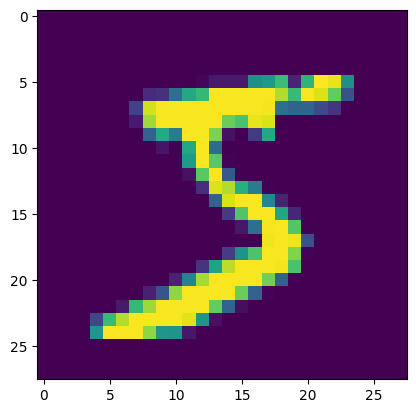

In [8]:
plt.imshow(X_train_base[0])

## Visualisation des données

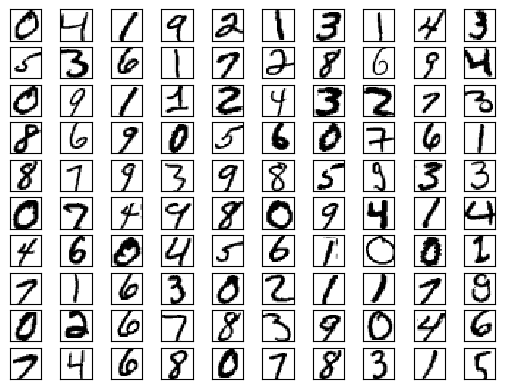

In [9]:
def plot_10_by_10_images(images):
    """ Plot 100 MNIST images in a 10 by 10 table. Note that we crop
    the images so that they appear reasonably close together.  The
    image is post-processed to give the appearance of being continued."""
    fig = plt.figure()
    images = [image[3:25, 3:25] for image in images]
    #image = np.concatenate(images, axis=1)
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x+1)
            ax.matshow(images[10*y+x+1], cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

plot_10_by_10_images(X_train_base)

## Aplatir les images
Les modèles de ML classiques ne prennet pas en compte l'aspect spatial des données. Il est nécessaire d'envoyer l'image sous forme de vecteur pour qu'elle soit reconnue à  l'entrée du modèle 

In [12]:
subset=60000 #size
nb_classes=10
X_train = X_train_base[:subset].reshape(subset, 784)
X_test = X_test_base.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
y_train = y_train_base[:subset]
y_test = y_test_base

In [13]:
print(X_train_base.shape)
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


## Création d'un modèle linéaire

In [15]:
import sklearn.linear_model

model=sklearn.linear_model.LogisticRegression(n_jobs=10)
model.fit(X_train,y_train) #trou

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
predictions=model.predict(X_test) #trou
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
model.predict_proba(X_test[:10])

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:    0.1s finished


array([[9.78591388e-04, 1.50338710e-03, 6.71004907e-03, 8.16814197e-03,
        2.59561357e-03, 2.69789109e-03, 5.95981460e-04, 9.63929249e-01,
        1.01426045e-03, 1.18068347e-02],
       [3.44255374e-02, 1.26105703e-02, 6.47651974e-01, 8.14297528e-02,
        5.48279429e-03, 4.33312313e-02, 1.15657673e-01, 1.25938203e-03,
        5.52011187e-02, 2.94996535e-03],
       [9.40180292e-05, 9.51421051e-01, 6.76386431e-03, 5.93687460e-03,
        4.40412884e-03, 4.70932398e-03, 3.47027375e-03, 8.19490437e-03,
        1.17819373e-02, 3.22362406e-03],
       [9.20009636e-01, 1.01490212e-04, 7.54842281e-03, 1.26411239e-02,
        3.86835729e-03, 1.96995512e-02, 2.12140769e-02, 5.94488241e-03,
        4.27507065e-03, 4.69738822e-03],
       [6.20875181e-03, 2.80446359e-03, 2.04684431e-02, 5.98503498e-03,
        7.95974281e-01, 1.38459678e-02, 2.81488911e-02, 3.11494843e-02,
        8.29035556e-03, 8.71243266e-02],
       [5.80973348e-05, 9.61733226e-01, 5.30285322e-03, 4.86243791e-03,
   

In [17]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(predictions,y_test)
print(accuracy)

0.9256


Notre baseline est de 92% de taux de bonnes predictions. 

## Test du modèle  Random Forest 

In [25]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=250,verbose=1,max_features='sqrt', max_depth=20, n_jobs=10)
model.fit(X_train,y_train) 
predictions=model.predict(X_test)
accuracy=accuracy_score(predictions,y_test) #trou
print(f"Accuracy : {accuracy:.2f}")

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    9.6s


Accuracy : 0.97


[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:   13.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:    0.1s finished


- A faire : modifier les paramètres de RandomForestClassifier pour améliorer le score. Il est au moins possible d'arriver à 97% en changeant juste les valeurs de n_estimators et max_features.
La documentation est disponible à cette adresse : 
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## Test du Support Vector Machine(svm)

- présentation du svm

In [ ]:
from sklearn import svm
# A compléter
model=svm.SVC(max_iter=100)
model.fit(X_train,y_train) 
predictions=model.predict(X_test)
accuracy=accuracy_score(predictions,y_test)
print(f"Accuracy : {accuracy:.2f}")

- A faire : modifier les paramètres de svm.SVC pour améliorer le score. Il est au moins possible d'arriver à 95%.
La documentation est disponible à cette adresse : 
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## Conclusion
- bonnes predictions pour les modèles de ML classiques
- scores toujours en dessous d'un être humain
- score qui continuera à descendre plus on augmente la taille des images

## Bonus
- visualiser les échantillons où le modèle s'est trompé de beaucoup

In [26]:
import pickle as pic
pic.dump(model, open('model_bck.pic','wb'))

loaded_model = pic.load(open('model_bck.pic','rb'))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:    0.2s finished


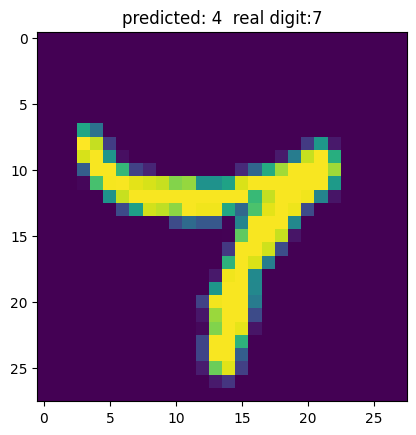

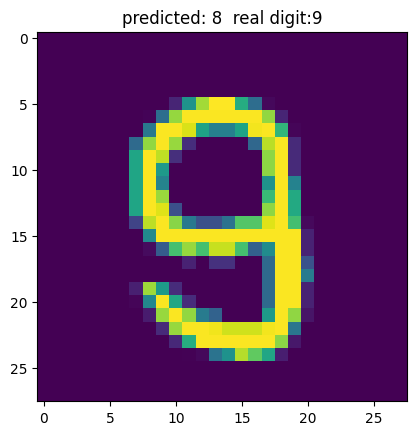

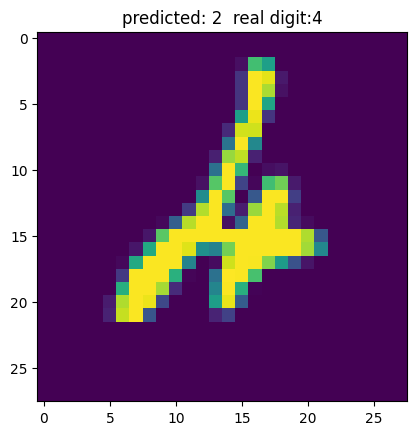

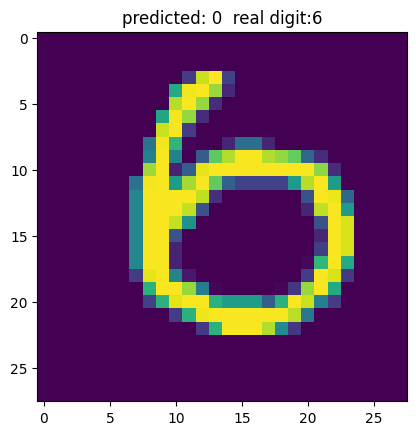

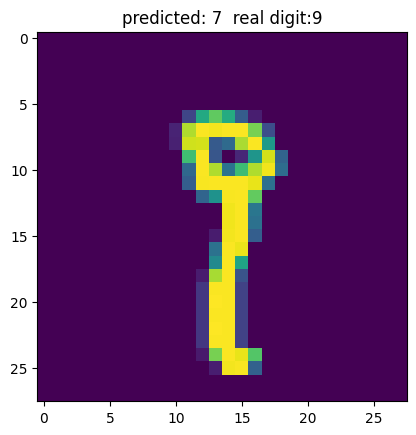

In [27]:
cpt = 0
predictions = loaded_model.predict(X_test)
for i in range(len(X_test)):
    if predictions[i]!=y_test[i] and cpt<5:
        cpt+=1
        plt.imshow(X_test_base[i])
        plt.title('predicted: '+ str(predictions[i])+ '  real digit:'+str(y_test[i]))
        plt.show()